In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('smartprix_phones_cleaned.csv')

In [3]:
df

,brand_name,model,price,rating,5G,nfc,ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,resolution,refresh_rate,rear_cam_num,front_cam_num,prim_rear_cam,prim_front_cam,extended_memory_available,extended_upto,os
0,motorola,Motorola Edge 60 Pro,29999,82.0,True,True,False,dimensity,8,3.35,...,6.70,1220 x 2712,120.0,3,1,50.0,50.0,0,NaN,android
1,vivo,Vivo T4 5G,21999,81.0,True,False,True,snapdragon,8,2.50,...,6.77,1080 x 2392,120.0,2,1,50.0,32.0,0,NaN,android
2,samsung,Samsung Galaxy S24 FE 5G,35558,86.0,True,True,False,exynos,10,3.11,...,6.70,1080 x 2340,120.0,3,1,50.0,10.0,0,NaN,android
3,motorola,Motorola Edge 60 Stylus,22990,88.0,True,True,False,snapdragon,8,2.40,...,6.70,1220 x 2712,120.0,2,1,50.0,32.0,1,1024.0,android
4,motorola,Motorola Edge 60 Fusion,24598,86.0,True,False,False,dimensity,8,2.50,...,6.70,1220 x 2712,120.0,2,1,50.0,32.0,1,1024.0,android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,itel,itel A50C,5549,NaN,False,False,False,unisoc,8,NaN,...,6.56,720 x 1612,60.0,1,1,8.0,5.0,1,NaN,android
898,itel,itel A50,5999,NaN,False,False,False,unisoc,8,NaN,...,6.60,720 x 1612,90.0,2,1,8.0,5.0,1,NaN,android
899,vivo,Vivo Y18i,8749,NaN,False,False,False,unisoc,8,NaN,...,6.56,720 x 1612,90.0,2,1,13.0,5.0,1,NaN,android
900,realme,Realme Narzo N63,8499,NaN,False,True,False,unisoc,8,1.80,...,6.75,720 x 1600,90.0,2,1,50.0,8.0,1,1024.0,android


## Uni-Variate Analysis

### Brand Name

<Axes: xlabel='brand_name'>

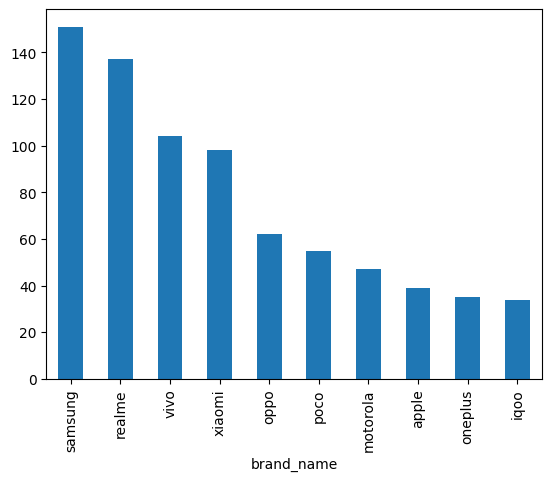

In [4]:
# Plot a graph about top 5 brand

df.brand_name.value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

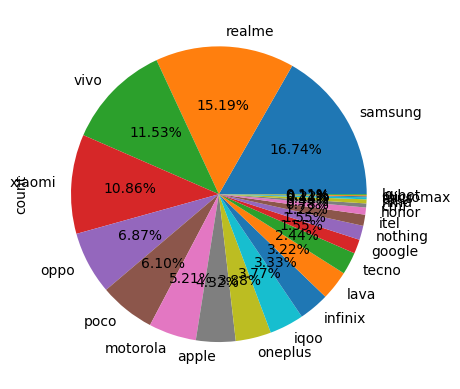

In [5]:
# Pie Chart

df.brand_name.value_counts().plot(kind='pie', autopct="%0.2f%%")

In [6]:
df.brand_name.isnull().sum()

np.int64(0)

### Model

In [7]:
df.model.nunique()

902

### Price

- Price columns is heavily skewed.
- There are few outliers.

In [8]:
df.price.describe()

count       902.000000
mean      28622.236142
std       28639.078597
min        5499.000000
25%       12580.250000
50%       19894.500000
75%       29999.000000
max      200999.000000
Name: price, dtype: float64

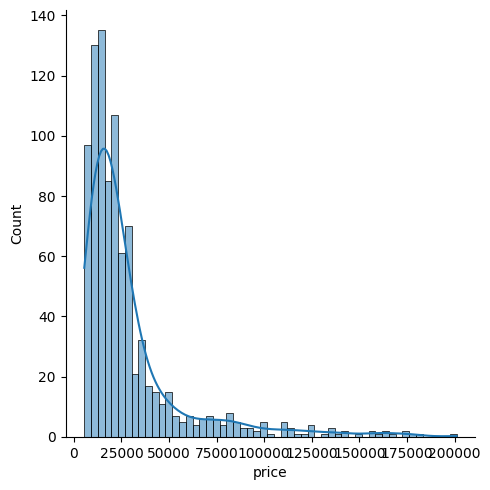

In [9]:
sns.displot(kind='hist', data=df, x ='price', kde=True)

In [10]:
df['price'].skew()

np.float64(2.8022127423622045)

<Axes: ylabel='price'>

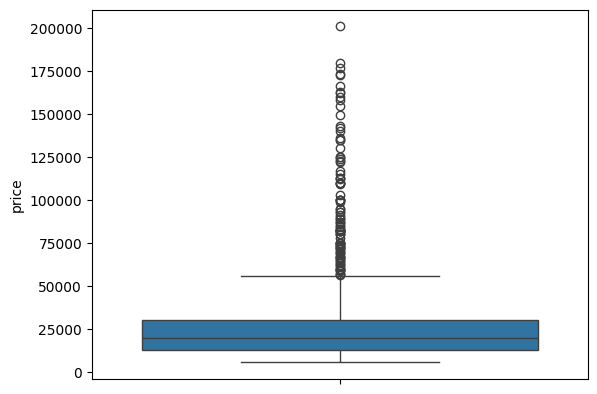

In [11]:
sns.boxplot(df['price'])

In [12]:
df[df['price'] > 200000]

,brand_name,model,price,rating,5G,nfc,ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,resolution,refresh_rate,rear_cam_num,front_cam_num,prim_rear_cam,prim_front_cam,extended_memory_available,extended_upto,os
521,samsung,Samsung Galaxy Z Fold 6 (12GB RAM + 1TB),200999,93.0,True,True,False,snapdragon,8,3.39,...,7.6,1856 x 2160,120.0,3,2,50.0,10.0,0,NaN,others


In [13]:
df.price.isnull().sum()

np.int64(0)

### Rating

- The distribution is near to normal
- There are few outliers.
- There are 33% missing values.

In [14]:
df['rating'].describe()

count    599.000000
mean      85.415693
std        3.662495
min       80.000000
25%       83.000000
50%       85.000000
75%       88.000000
max       98.000000
Name: rating, dtype: float64

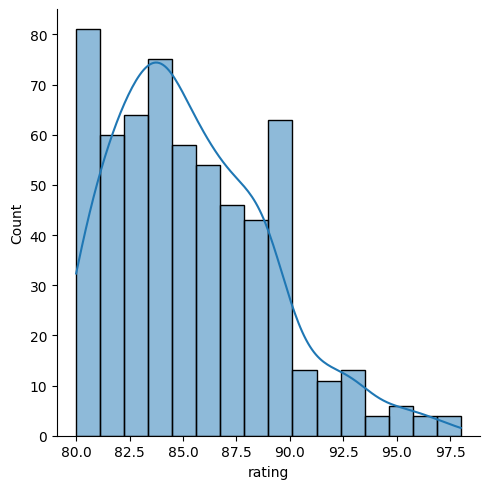

In [15]:
sns.displot(kind='hist', data=df, x ='rating', kde=True)

In [16]:
df['price'].skew()

np.float64(2.8022127423622045)

<Axes: ylabel='rating'>

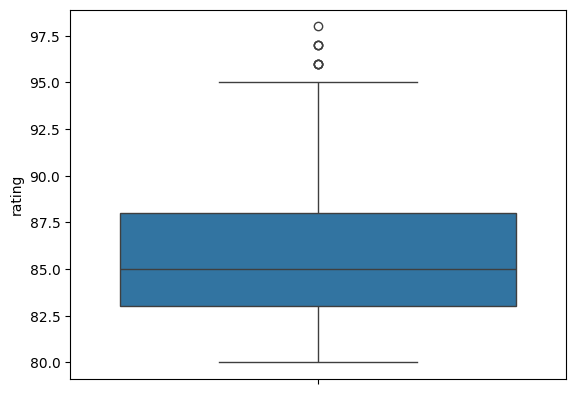

In [17]:
sns.boxplot(df['rating'])

In [18]:
(df.rating.isnull().sum()/902 ) * 100

np.float64(33.5920177383592)

### 5G, NFC, IR Blaster

<Axes: ylabel='count'>

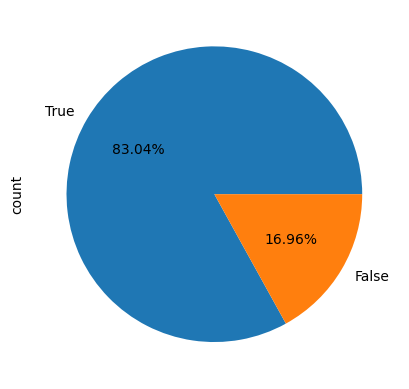

In [19]:
df['5G'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

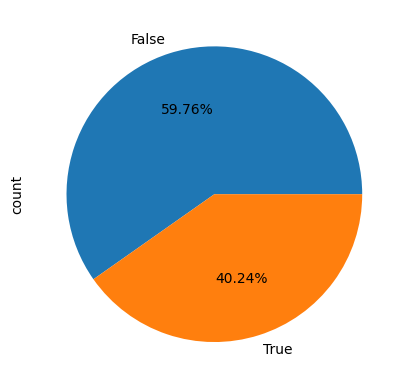

In [20]:
df['nfc'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

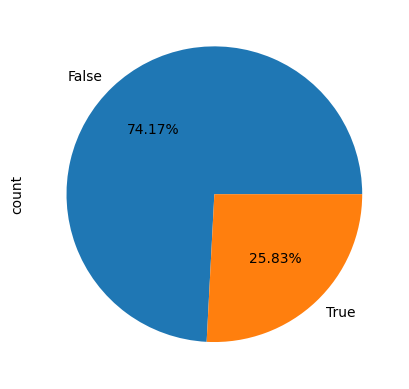

In [21]:
df['ir_blaster'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [22]:
df[df['ir_blaster'] == True]['brand_name'].value_counts()

brand_name
xiaomi     76
poco       39
oneplus    20
oppo       20
iqoo       17
vivo       17
infinix    16
tecno      14
realme     12
honor       2
Name: count, dtype: int64

### Processor Brand

In [26]:
df['processor_brand'].value_counts()

processor_brand
dimensity     347
snapdragon    337
exynos         56
helio          56
unisoc         42
bionic         36
tensor         14
tiger           6
apple           3
Name: count, dtype: int64

In [24]:
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('a13', 'apple')
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('dimensit', 'dimensity')
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('google', 'tensor')
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('spreadtrum', 'unisoc')
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('qualcomm', 'snapdragon')
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('dimensityy', 'dimensity')

<Axes: ylabel='count'>

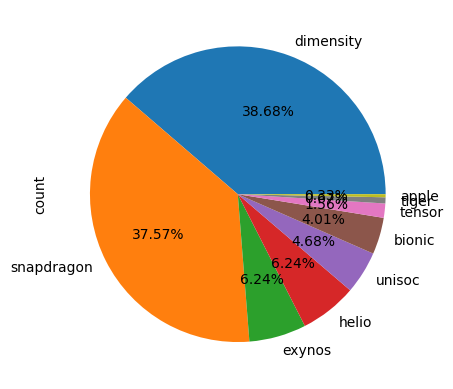

In [27]:
df['processor_brand'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

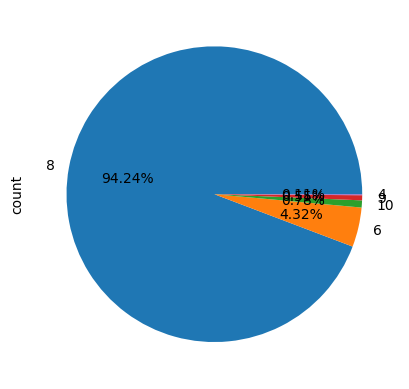

In [28]:
df['num_cores'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

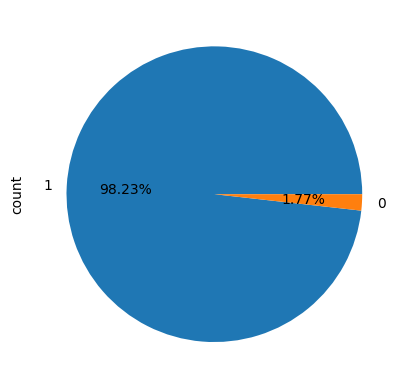

In [29]:
df['fast_charging_available'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

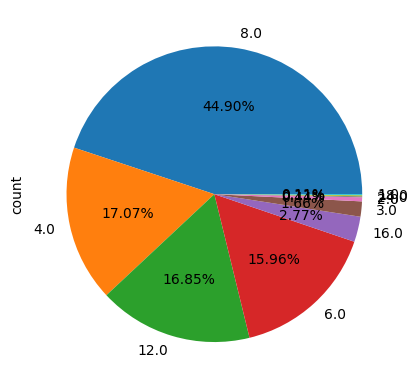

In [31]:
df['ram_'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

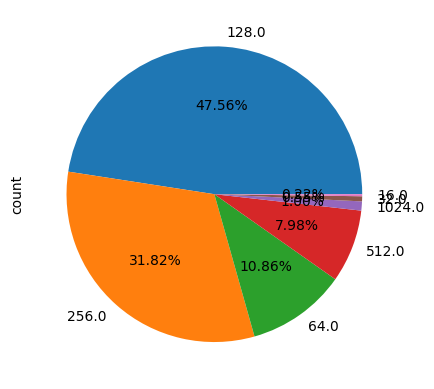

In [32]:
df['rom_'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

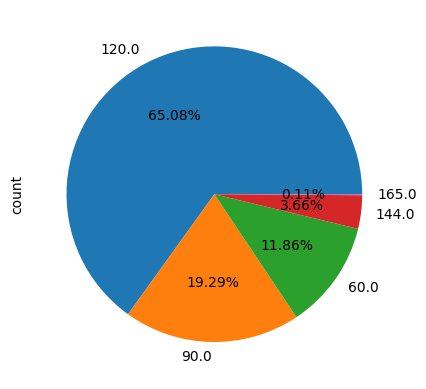

In [33]:
df['refresh_rate'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

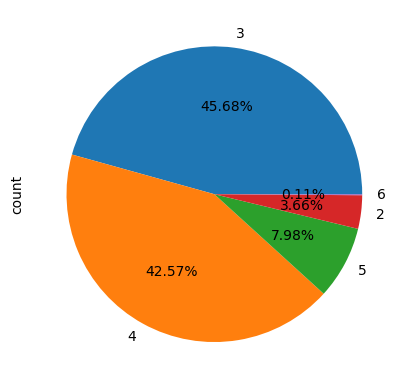

In [35]:
(df['rear_cam_num'] + df['front_cam_num']).value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

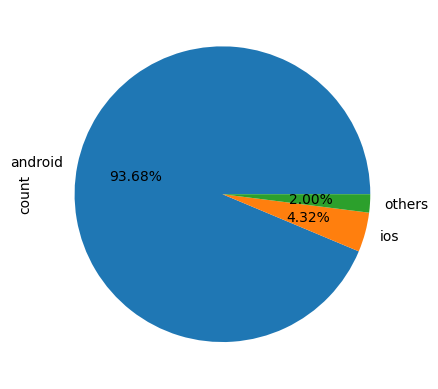

In [ ]:
df['os'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

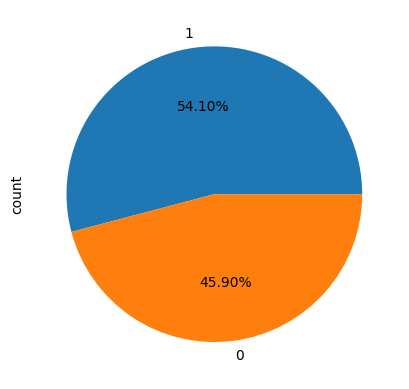

In [37]:
df['extended_memory_available'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

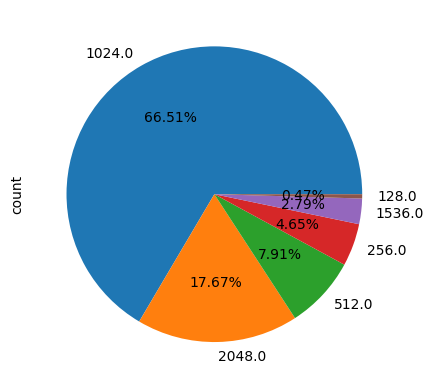

In [38]:
df['extended_upto'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [42]:
def plot_graphs(column_name):
    
    sns.displot(kind='hist', kde=True, data=df, x=column_name, label=column_name)
    sns.catplot(kind='box',data=df, x=column_name)

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


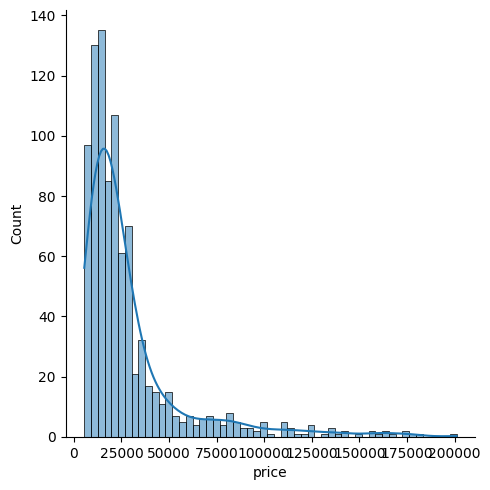

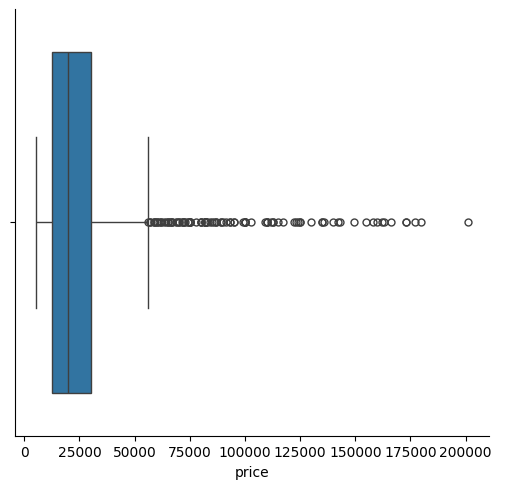

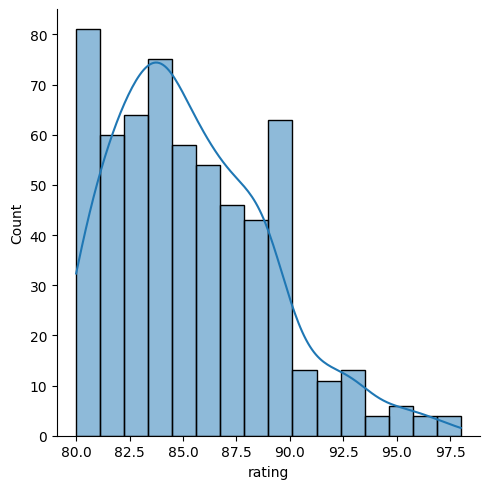

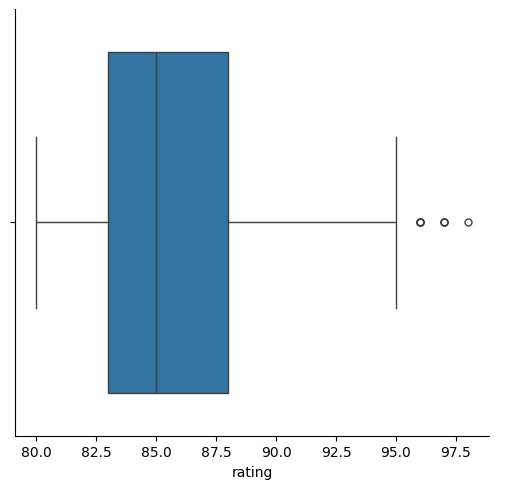

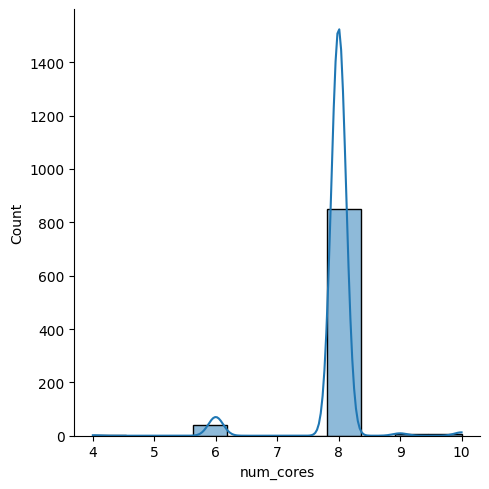

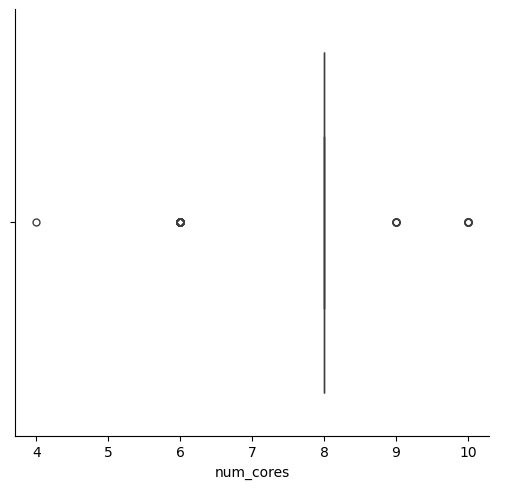

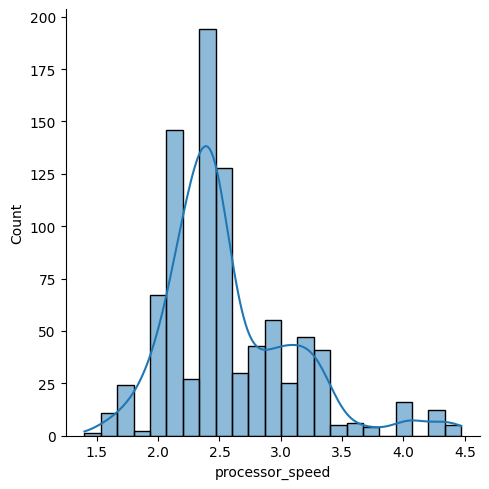

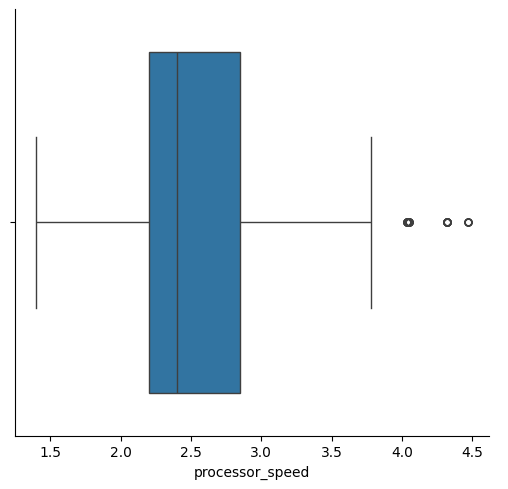

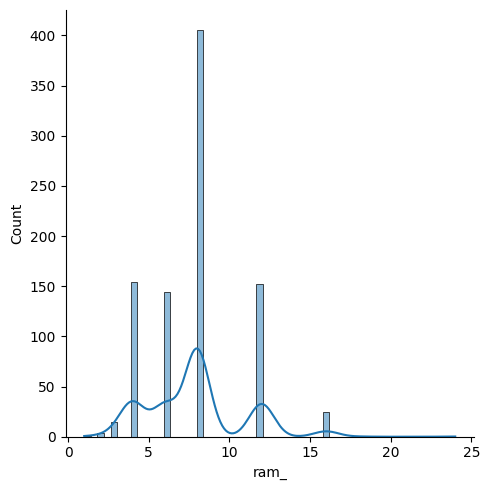

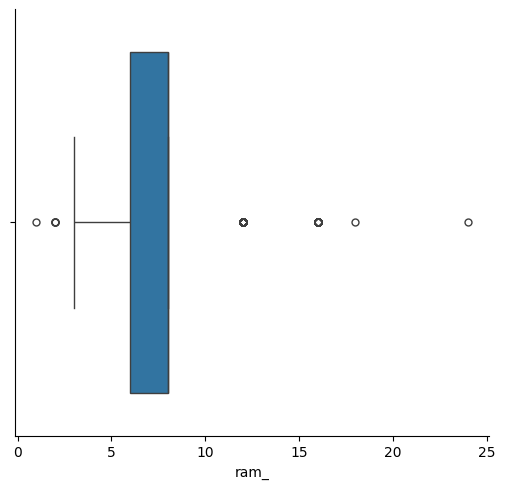

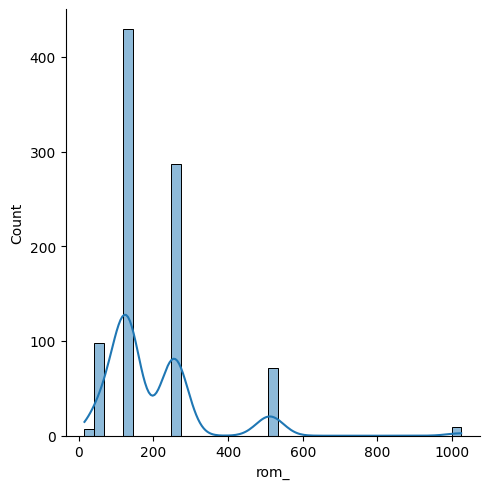

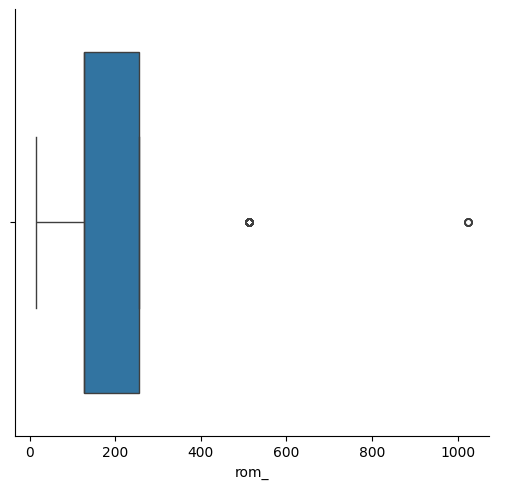

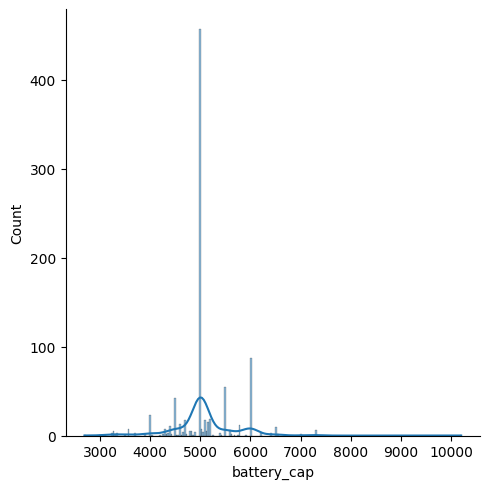

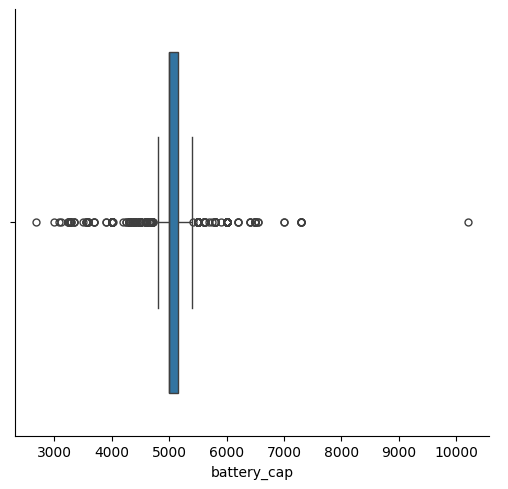

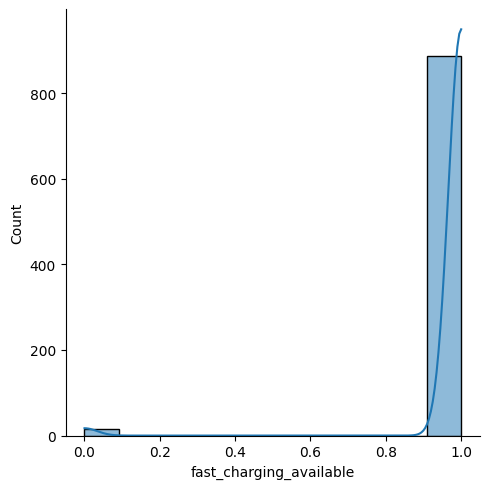

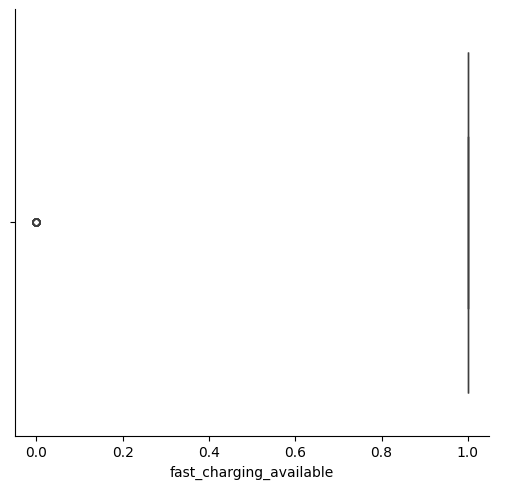

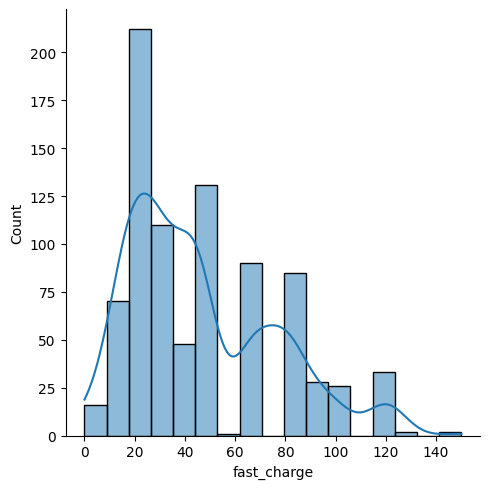

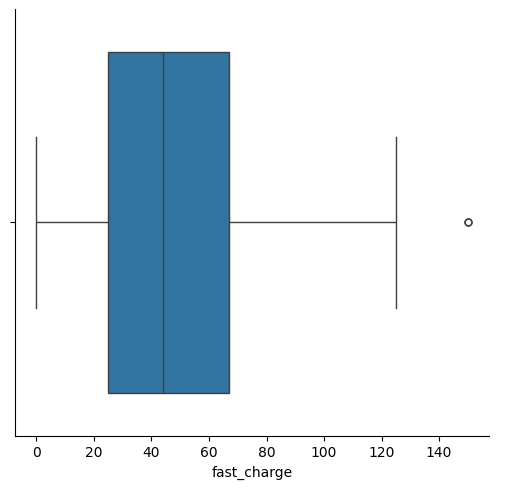

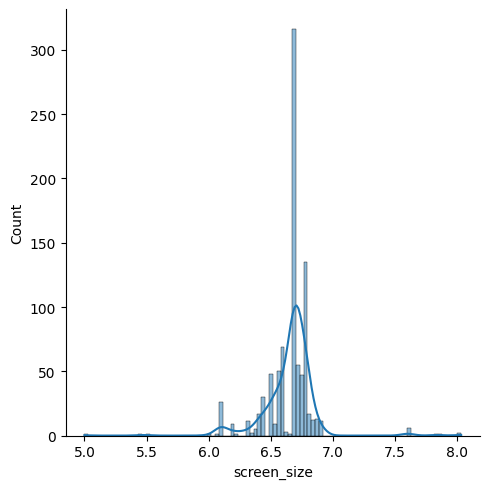

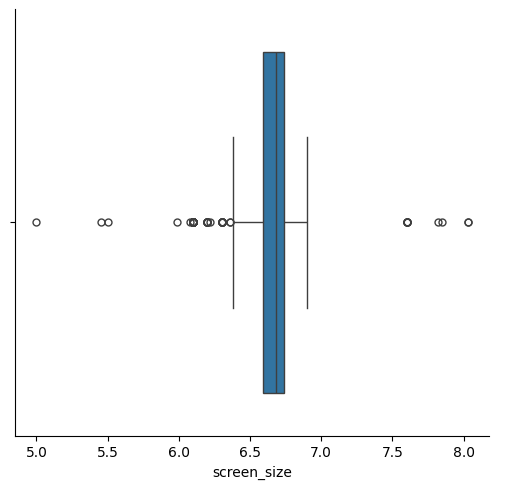

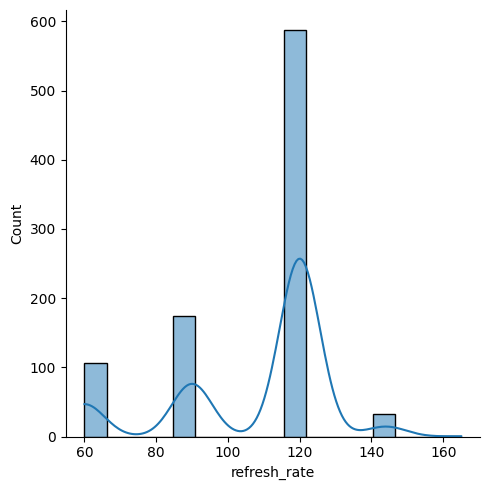

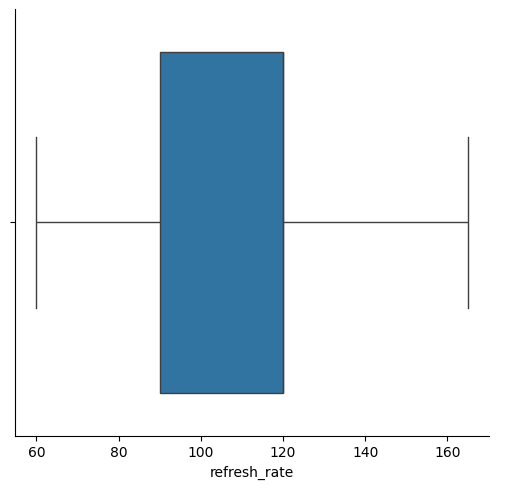

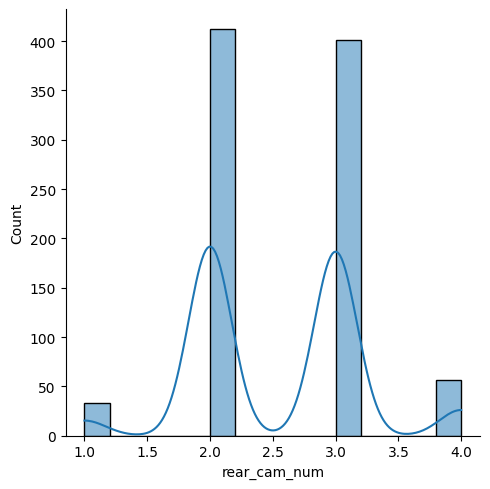

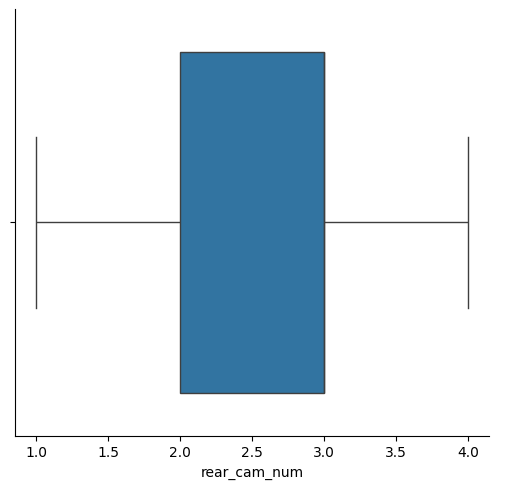

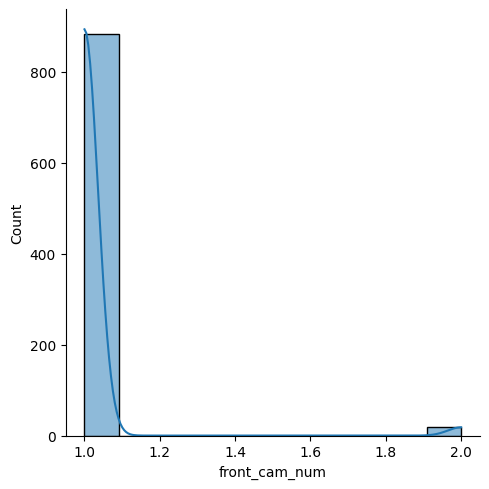

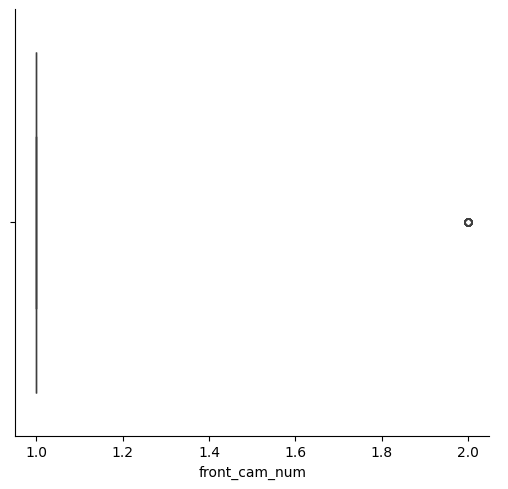

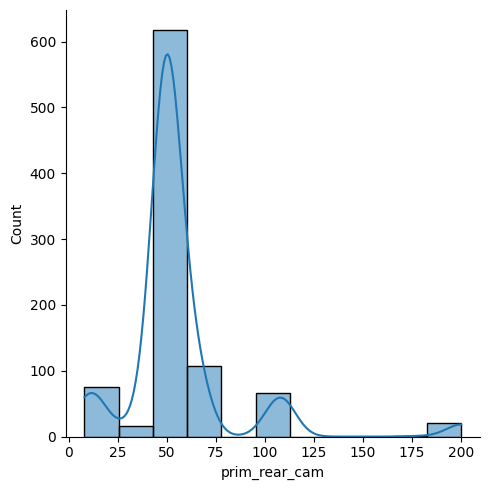

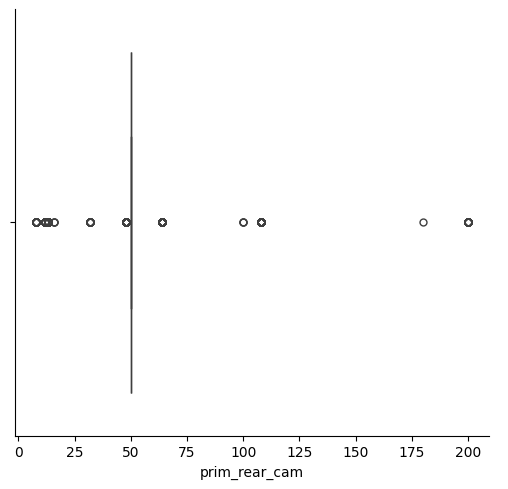

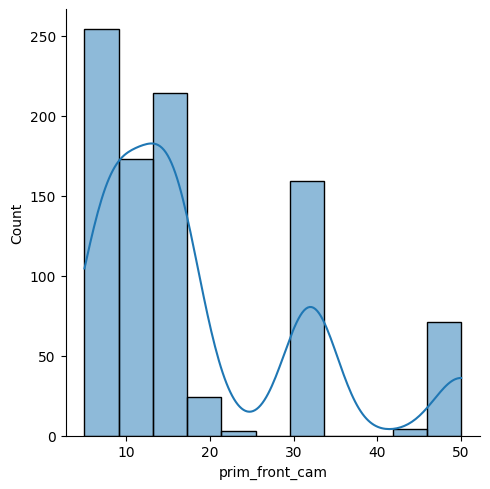

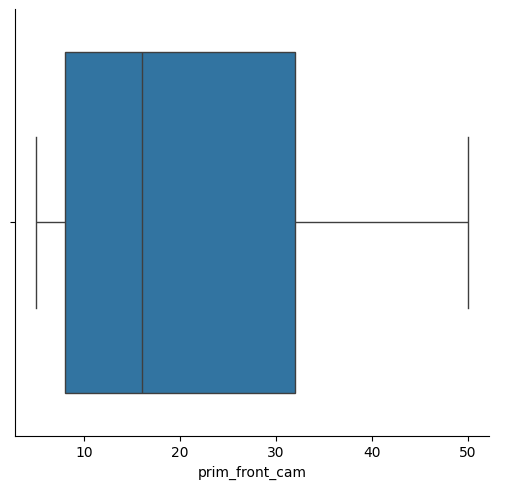

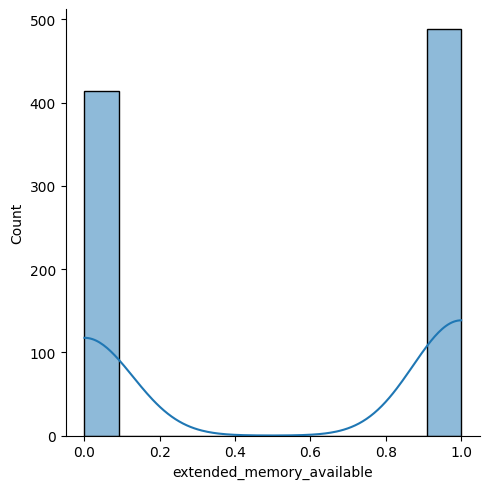

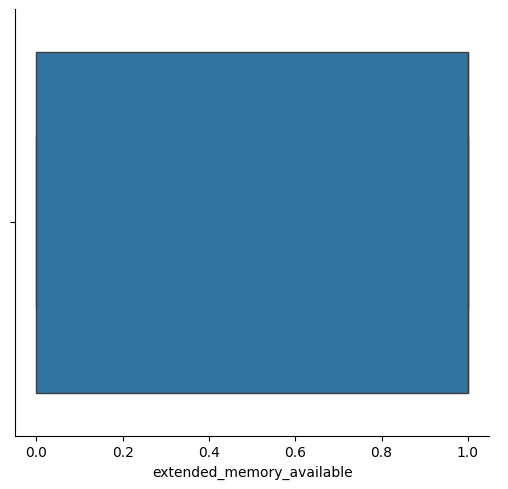

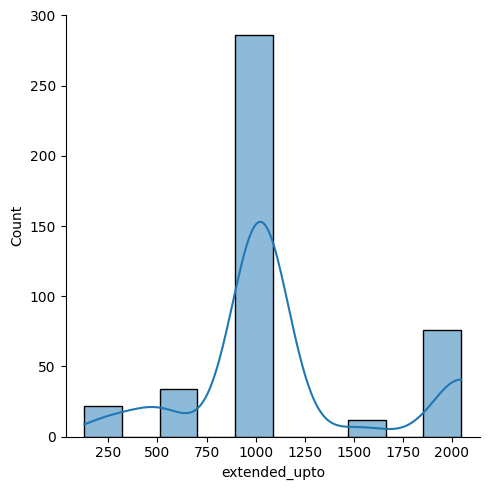

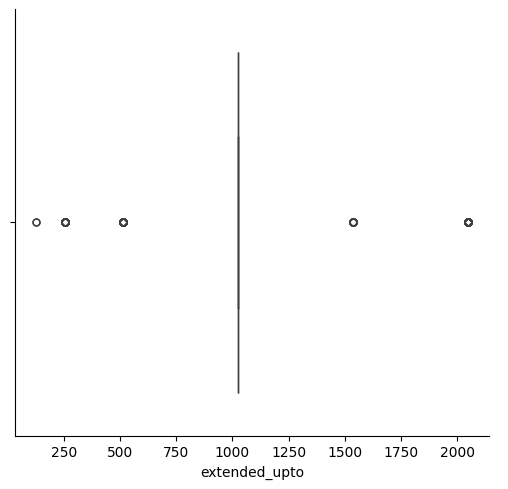

In [43]:
num_columns = df.select_dtypes(include=['float64','int64']).columns

for col in num_columns:
    plot_graphs(col)

In [30]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', '5G', 'nfc', 'ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'ram_', 'rom_',
       'battery_cap', 'fast_charging_available', 'fast_charge', 'screen_size',
       'resolution', 'refresh_rate', 'rear_cam_num', 'front_cam_num',
       'prim_rear_cam', 'prim_front_cam', 'extended_memory_available',
       'extended_upto', 'os'],
      dtype='object')

## Bi-Variate Analysis